In [1]:
from glob import glob
import os.path as op
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

In [2]:
import nibabel as nib
from nibabel.streamlines import load as load_trk
import dipy.tracking.streamline as dts
import dipy.tracking.utils as dtu
from skimage.transform import resize
from scipy.ndimage.morphology import binary_dilation
import dipy.data as dpd
from sklearn.utils import class_weight

In [3]:
import keras
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, LeakyReLU
from keras.layers import Conv2D, MaxPooling2D

Using TensorFlow backend.


In [4]:
import bundlenet as bn

In [5]:
import dask.bag as db

In [6]:
bundle_files = sorted(glob(op.join(op.expanduser('~'), '/Users/arokem/AFQ_data/recobundles_atlas/bundles/*.trk')))

In [7]:
diff_img = nib.load('/Users/arokem/.dipy/mni_template/mni_icbm152_t1_tal_nlin_asym_09c.nii')
vol_shape=diff_img.shape[0:3]
vol_shape

(193, 229, 193)

In [8]:
bundle_files

['/Users/arokem/AFQ_data/recobundles_atlas/bundles/AF_L.trk',
 '/Users/arokem/AFQ_data/recobundles_atlas/bundles/AF_R.trk',
 '/Users/arokem/AFQ_data/recobundles_atlas/bundles/CCMid.trk',
 '/Users/arokem/AFQ_data/recobundles_atlas/bundles/CC_ForcepsMajor.trk',
 '/Users/arokem/AFQ_data/recobundles_atlas/bundles/CC_ForcepsMinor.trk',
 '/Users/arokem/AFQ_data/recobundles_atlas/bundles/CST_L.trk',
 '/Users/arokem/AFQ_data/recobundles_atlas/bundles/CST_R.trk',
 '/Users/arokem/AFQ_data/recobundles_atlas/bundles/C_L.trk',
 '/Users/arokem/AFQ_data/recobundles_atlas/bundles/C_R.trk',
 '/Users/arokem/AFQ_data/recobundles_atlas/bundles/F_L.trk',
 '/Users/arokem/AFQ_data/recobundles_atlas/bundles/F_R.trk',
 '/Users/arokem/AFQ_data/recobundles_atlas/bundles/IF0F_R.trk',
 '/Users/arokem/AFQ_data/recobundles_atlas/bundles/IFOF_L.trk',
 '/Users/arokem/AFQ_data/recobundles_atlas/bundles/MCP.trk',
 '/Users/arokem/AFQ_data/recobundles_atlas/bundles/UF_L.trk',
 '/Users/arokem/AFQ_data/recobundles_atlas/bun

In [11]:
n_streamlines = []
bundle_names = []
for fname in bundle_files:
    bundle_names.append(fname.split('/')[-1].split('bundles_')[-1].split('.trk')[0])
    streamlines = bn.read_sl(fname) 
    n_streamlines.append(len(streamlines))


In [12]:
np.min(n_streamlines), len(n_streamlines)

(72, 16)

In [13]:
take_n_bundles = len(n_streamlines)
take_n_sl = np.min(n_streamlines)

test_perc=0.2
val_perc=0.2
size_slimage = 100

In [15]:
import imp  
imp.reload(bn)

#if op.exists('./subject1_bundles.npz'):
    # Read it from file:
   # loaded_from_file = np.load('./subject1_bundles.npz')
    #labels_test = loaded_from_file['labels_test']
    #labels_val = loaded_from_file['labels_val']
    #labels_train = loaded_from_file['labels_train']
    #data_test = loaded_from_file['data_test']
   # data_val = loaded_from_file['data_val']
    #data_train = loaded_from_file['data_train']
#else:
streamlines_loaded = db.from_sequence(bundle_files).map(bn.read_sl_mni).compute()
streamlines_processed = db.from_sequence(streamlines_loaded).map(bn.process_sl,take_n_sl,vol_shape,size_slimage,5).compute() 
data_train, data_test, data_val, labels_train, labels_test, labels_val = bn.partition_testtrain(test_perc, val_perc, streamlines_processed)
np.savez('./atlas_bundles', data_train=data_train, labels_train=labels_train, data_val=data_val, labels_val=labels_val, data_test=data_test, labels_test=labels_test)

0
0


/Users/arokem/.virtualenvs/bundlenet/lib/python3.7/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/arokem/.virtualenvs/bundlenet/lib/python3.7/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


0


/Users/arokem/.virtualenvs/bundlenet/lib/python3.7/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/arokem/.virtualenvs/bundlenet/lib/python3.7/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/arokem/.virtualenvs/bundlenet/lib/python3.7/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
/Users/arokem/.virtualenvs/bundlenet/lib/python3.7/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing art

0


/Users/arokem/.virtualenvs/bundlenet/lib/python3.7/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/arokem/.virtualenvs/bundlenet/lib/python3.7/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


0


/Users/arokem/.virtualenvs/bundlenet/lib/python3.7/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/arokem/.virtualenvs/bundlenet/lib/python3.7/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


0


/Users/arokem/.virtualenvs/bundlenet/lib/python3.7/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/arokem/.virtualenvs/bundlenet/lib/python3.7/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


0


/Users/arokem/.virtualenvs/bundlenet/lib/python3.7/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/arokem/.virtualenvs/bundlenet/lib/python3.7/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


0


/Users/arokem/.virtualenvs/bundlenet/lib/python3.7/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/arokem/.virtualenvs/bundlenet/lib/python3.7/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


0
0
0
0
0
0
0
0


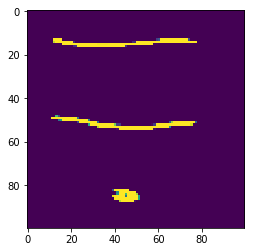

In [16]:
plt.imshow(streamlines_processed[5][1,:,:,0])

In [17]:
img_rows = size_slimage
img_cols = size_slimage
batch_size = 4
epochs = 16
num_classes = take_n_bundles
input_shape = (img_rows, img_cols,1)

In [18]:
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(labels_train),
                                                 labels_train)

In [21]:
from sklearn.svm import SVC

In [23]:
my_svc = SVC()

In [24]:
my_svc.fit(data_train.reshape((data_train.shape[0], -1)), labels_train)

/Users/arokem/.virtualenvs/bundlenet/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [26]:
my_svc.score(data_test.reshape(data_test.shape[0], -1), labels_test)

0.9836734693877551

In [28]:
p = my_svc.predict(data_test.reshape(data_test.shape[0], -1))

In [36]:
bn.print_accuarcystats(p, labels_test)

Percent correct is 0.9836734693877551 
Kappa is: 0.9825221594050401
Jaccard is: 0.9836734693877551


Cross-predict on *another subject*

In [38]:
#diff_img = nib.load('/Users/arokem/.dipy/mni_template/mni_icbm152_t1_tal_nlin_asym_09c.nii')
sub2_t1_img = nib.load('/Users/arokem/.dipy/mni_template/mni_icbm152_t1_tal_nlin_asym_09c.nii')
vol_shape_subj2=sub2_t1_img.shape[0:3]
vol_shape_subj2

(193, 229, 193)

In [39]:
streamlines_all = bn.read_sl_mni('/Users/arokem/AFQ_data/HCP/derivatives/preafq/sub-100307/sess-01/dwi/out_work/whole_brain_MNI_tracks_from_sh__moved.trk') 

# streamlines_all = bn.read_sl_mni('/home/ubuntu/recobundles/100307/out_work/whole_brain_MNI_tracks_from_sh__moved.trk') 

In [41]:
map_files = sorted(glob('/Users/arokem/AFQ_data/HCP/derivatives/preafq/sub-100307/sess-01/dwi/out_work/rrbs/whole_brain_MNI_tracks_from_sh__moved_*.npy'))
map_file_index = []
labels_subj2 = []
for m_idx, m in enumerate(map_files):
    tmp = np.load(m)
    map_file_index = np.append(map_file_index,tmp)
    labels_subj2 = np.append(labels_subj2,m_idx*np.ones([len(tmp),1]))
labels_subj2

array([ 0.,  0.,  0., ..., 15., 15., 15.])

In [42]:
ind = range(len(streamlines_all))
ind = np.delete(ind,map_file_index)
np.random.shuffle(ind)
unlabeled_streamlines = ind[0:len(map_file_index)]
labels_subj2 = np.append(labels_subj2,16*np.ones([len(map_file_index),1]))

/Users/arokem/.virtualenvs/bundlenet/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
  


In [43]:
labels_subj2

array([ 0.,  0.,  0., ..., 16., 16., 16.])

In [44]:
np.append(map_file_index,unlabeled_streamlines)

array([177097., 174803., 168690., ...,  52428., 149896.,  71718.])

In [45]:
streamlines_all_sub = [streamlines_all[i] for i in np.int_(np.append(map_file_index,unlabeled_streamlines))]
len(streamlines_all_sub)
len(labels_subj2)

56338

In [46]:
import imp  
imp.reload(bn)
streamlines_all_processed = bn.process_sl(streamlines_all_sub,-1,vol_shape_subj2,size_slimage,5)

/Users/arokem/.virtualenvs/bundlenet/lib/python3.7/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/arokem/.virtualenvs/bundlenet/lib/python3.7/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000


In [47]:
tmp1 = np.load(map_files[0])
tmp2 = np.load(map_files[1])
tmp = np.append(tmp1,tmp2)
streamlines_bund1 = [streamlines_all[i] for i in np.int_(tmp)]
streamlines_bund1_processed = bn.process_sl(streamlines_bund1,-1,vol_shape_subj2,size_slimage,5)

0


/Users/arokem/.virtualenvs/bundlenet/lib/python3.7/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/arokem/.virtualenvs/bundlenet/lib/python3.7/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


1000
2000


In [48]:
map_files

['/Users/arokem/AFQ_data/HCP/derivatives/preafq/sub-100307/sess-01/dwi/out_work/rrbs/whole_brain_MNI_tracks_from_sh__moved_AF_L__labels.npy',
 '/Users/arokem/AFQ_data/HCP/derivatives/preafq/sub-100307/sess-01/dwi/out_work/rrbs/whole_brain_MNI_tracks_from_sh__moved_AF_R__labels.npy',
 '/Users/arokem/AFQ_data/HCP/derivatives/preafq/sub-100307/sess-01/dwi/out_work/rrbs/whole_brain_MNI_tracks_from_sh__moved_CCMid__labels.npy',
 '/Users/arokem/AFQ_data/HCP/derivatives/preafq/sub-100307/sess-01/dwi/out_work/rrbs/whole_brain_MNI_tracks_from_sh__moved_CC_ForcepsMajor__labels.npy',
 '/Users/arokem/AFQ_data/HCP/derivatives/preafq/sub-100307/sess-01/dwi/out_work/rrbs/whole_brain_MNI_tracks_from_sh__moved_CC_ForcepsMinor__labels.npy',
 '/Users/arokem/AFQ_data/HCP/derivatives/preafq/sub-100307/sess-01/dwi/out_work/rrbs/whole_brain_MNI_tracks_from_sh__moved_CST_L__labels.npy',
 '/Users/arokem/AFQ_data/HCP/derivatives/preafq/sub-100307/sess-01/dwi/out_work/rrbs/whole_brain_MNI_tracks_from_sh__moved_C

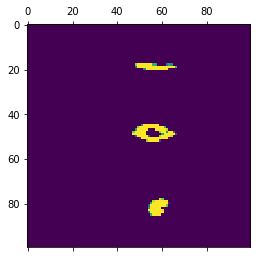

In [49]:
plt.matshow(streamlines_all_processed[10000, :,:,0])

In [50]:
streamlines_all_processed.shape

(56338, 100, 100, 1)

In [51]:
p_subj2 = my_svc.predict(streamlines_all_processed.reshape(streamlines_all_processed.shape[0], -1))

In [52]:
p_subj2

array([ 0.,  0.,  0., ..., 13.,  4., 13.])

In [55]:
bn.print_accuarcystats(p_subj2[labels_subj2<16],labels_subj2[labels_subj2<16])

Percent correct is 0.9570449785224893 
Kappa is: 0.9488507315222424
Jaccard is: 0.9570449785224893
